In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("mnist_train.csv")
data.shape

(60000, 785)

In [7]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_data = data["label"]
x_data = data.drop(["label"],axis=1)
print(x_data.shape,y_data.shape)

(60000, 784) (60000,)


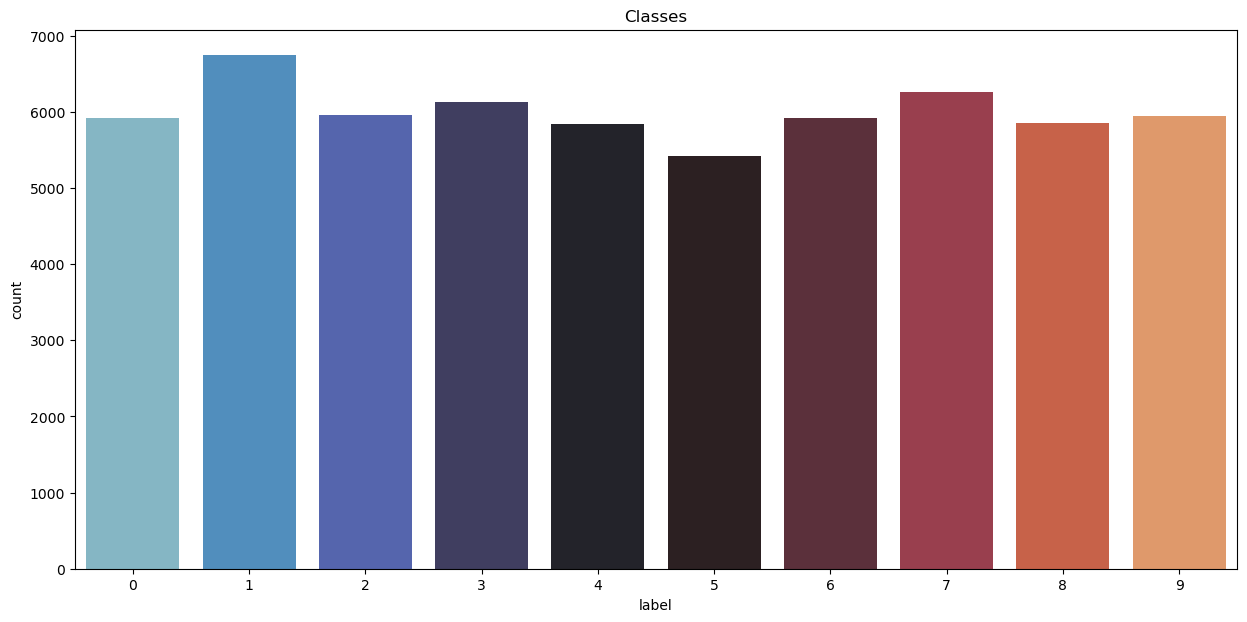

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64


In [15]:
plt.figure(figsize=(15,7))
g = sns.countplot(x = y_data,palette="icefire")
plt.title("Classes")
plt.show()
print(y_data.value_counts())

In [16]:
figure_shape = int(np.sqrt(x_data.shape[1]))
figure_shape

28

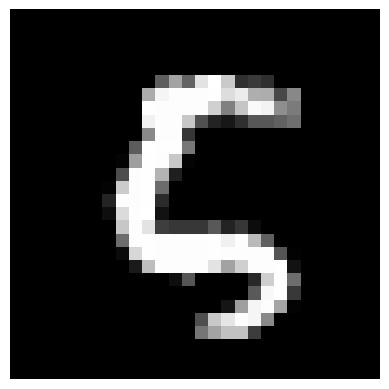

In [19]:
first_fig = x_data.iloc[2000].values
first_fig = first_fig.reshape((figure_shape,figure_shape))
plt.imshow(first_fig,cmap="gray")
plt.axis("off")
plt.show()

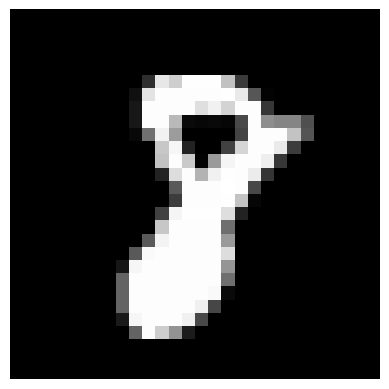

In [20]:
first_fig = x_data.iloc[19000].values
first_fig = first_fig.reshape((figure_shape,figure_shape))
plt.imshow(first_fig,cmap="gray")
plt.axis("off")
plt.show()

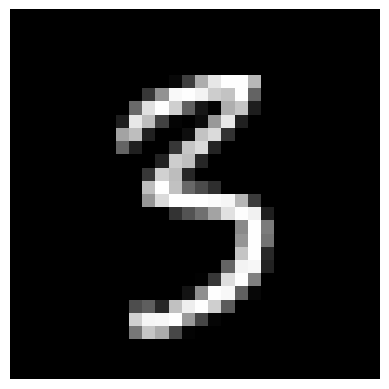

In [21]:
first_fig = x_data.iloc[33000].values
first_fig = first_fig.reshape((figure_shape,figure_shape))
plt.imshow(first_fig,cmap="gray")
plt.axis("off")
plt.show()

In [22]:
# Normalization from gray tone
x_data = x_data / 255.0

In [23]:
x_data = x_data.values.reshape(-1,28,28,1) # >> to 4 dimensional
print("x train:",x_data.shape)

x train: (60000, 28, 28, 1)


In [27]:
from keras.utils import to_categorical # to convert to vectors 
y_data = to_categorical(y_data,num_classes=10)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                   y_data, test_size =0.1,random_state=2)
print("X train shape:",x_train.shape)
print("X test shape:",x_test.shape)
print("Y train shape:",y_train.shape)
print("Y test shape:",y_test.shape)

X train shape: (54000, 28, 28, 1)
X test shape: (6000, 28, 28, 1)
Y train shape: (54000, 10, 10)
Y test shape: (6000, 10, 10)


In [32]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#------------------ 8 layers 
model.add(Conv2D(filters = 8, kernel_size = (5,5),
                 padding= "Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Dropout(0.25))
#------------------ 16 layers
model.add(Conv2D(filters = 16, kernel_size = (3,3),
                 padding= "Same",activation="relu"))
model.add(MaxPool2D(pool_size =(2,2),strides = (2,2)))
model.add(Dropout(0.25))
# final link
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))


In [34]:
optimizer = Adam(learning_rate = 0.001,beta_1 =0.9,beta_2=0.999)

In [53]:
model.compile(optimizer =optimizer,loss="categorical_crossentropy",
              metrics=["accuracy"] )

In [54]:
epochs = 10
batch_size = 250

In [59]:
datagen = ImageDataGenerator(
featurewise_center=False, # girdi
samplewise_center=False, # her bir
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False, # dimesion red
rotation_range=5, # boyut küçültme
zoom_range = 0.1, # % 10 gorüntüyü r
width_shift_range=0.1, # gorüntüler
height_shift_range=0.1, # goruntule
horizontal_flip=False, # gorüntüler
vertical_flip=False) # görüntüleri

datagen.fit(x_train)

In [60]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] 
    // batch_size, verbose=2
)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node adam/Sub_30 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start

  File "C:\Users\Huawei\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\Huawei\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\Huawei\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code

  File "C:\Users\Huawei\AppData\Local\Temp\ipykernel_18436\285787537.py", line 2, in <module>

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 73, in train_step

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py", line 291, in apply_gradients

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py", line 356, in apply

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py", line 419, in _backend_apply_gradients

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\optimizer.py", line 121, in _backend_update_step

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\optimizer.py", line 135, in _distributed_tf_update_step

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\optimizer.py", line 132, in apply_grad_to_update_var

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\optimizers\adam.py", line 133, in update_step

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\ops\numpy.py", line 5480, in subtract

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\sparse.py", line 493, in sparse_wrapper

  File "C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 346, in subtract

Incompatible shapes: [10] vs. [0]
	 [[{{node adam/Sub_30}}]] [Op:__inference_one_step_on_iterator_3044]